In [13]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [14]:
data = pd.read_csv("data/articulos_ml.csv")

In [15]:
data.shape

(161, 8)

In [16]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [17]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


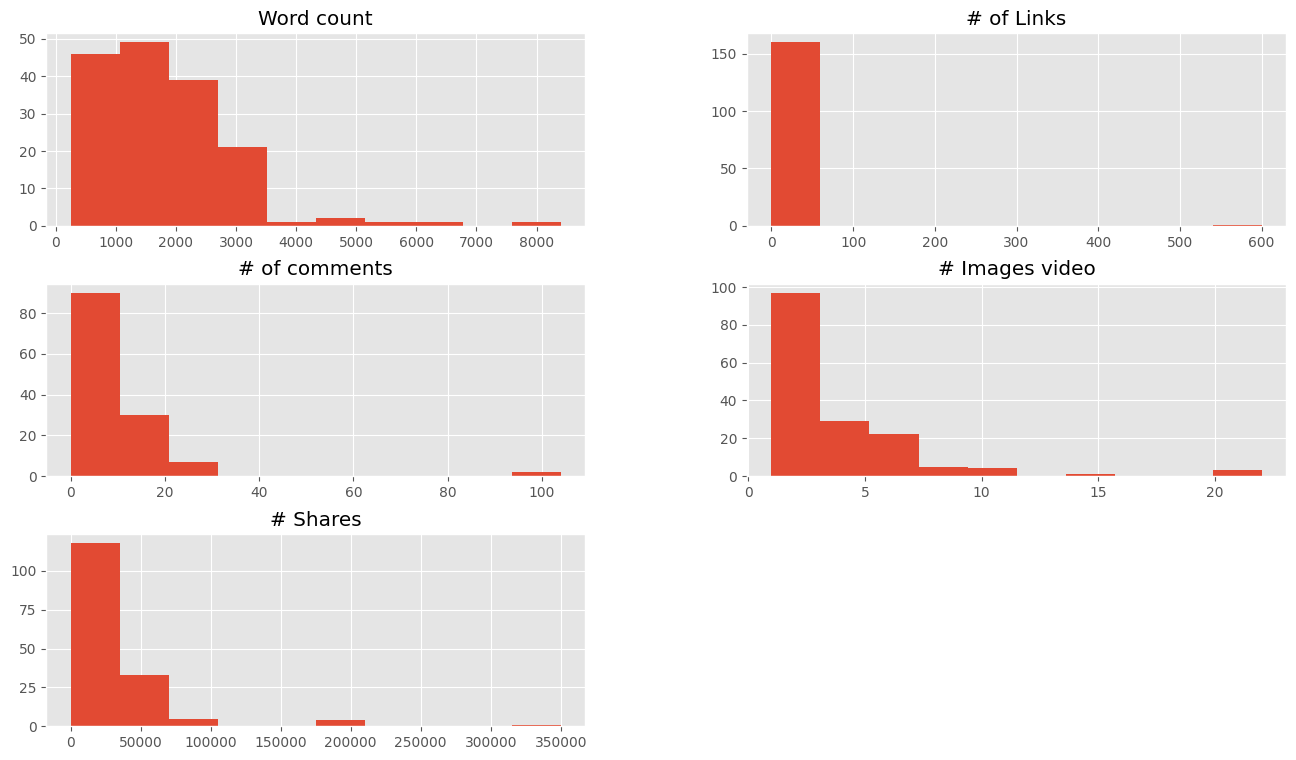

In [25]:
data.drop(columns = ['Title','url', 'Elapsed days']).hist()
plt.show()

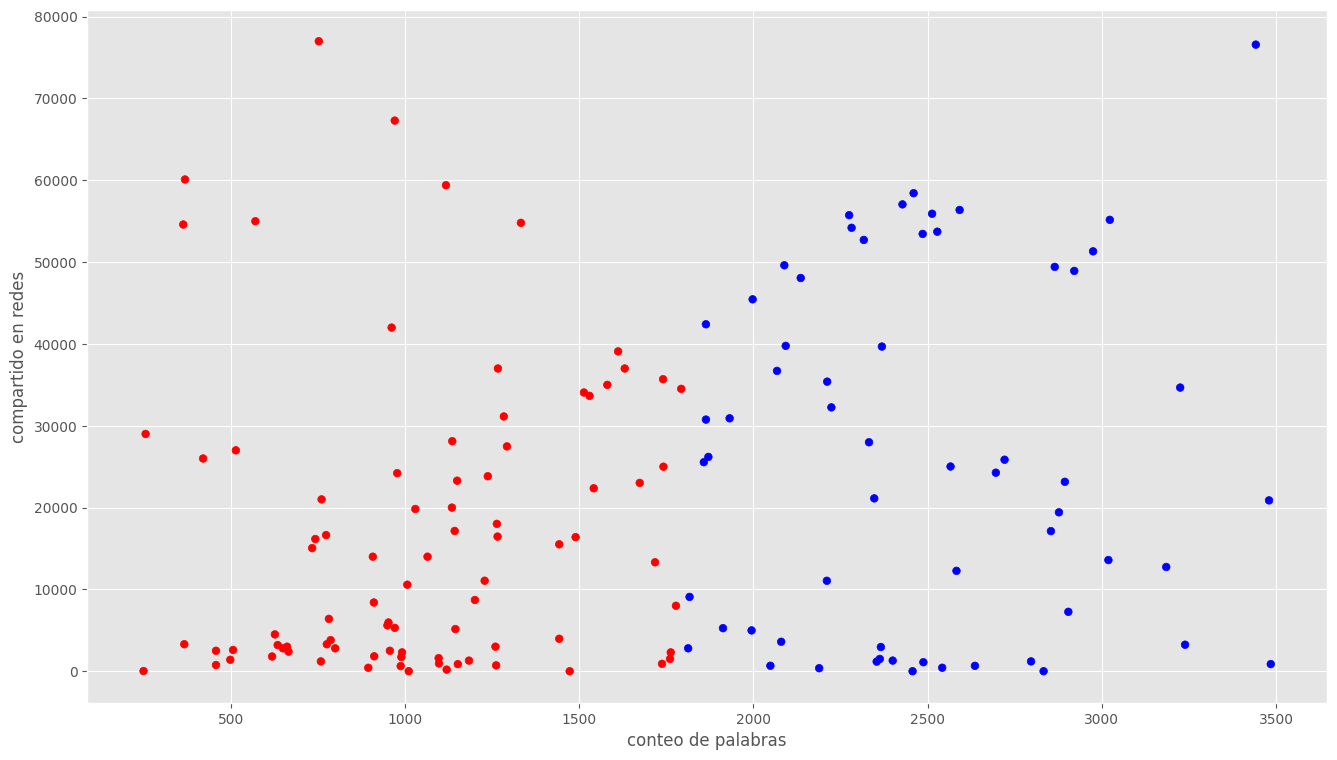

In [33]:
filtered_data = data[(data["Word count"] <= 3500) & (data["# Shares"] <= 80000)]
colors = ["blue", "red"]
size = [30, 60]

f1 = filtered_data["Word count"].values
f2 = filtered_data["# Shares"].values

assign = []
for index, row in filtered_data.iterrows():
    if(row["Word count"] > 1808):
        assign.append(colors[0])
    else:
        assign.append(colors[1])
plt.scatter(f1, f2, c=assign, s=size[0])
plt.xlabel("conteo de palabras")
plt.ylabel("compartido en redes")
plt.show()

In [30]:
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data["# Shares"].values

#objeto de regresion linear
regre = linear_model.LinearRegression()

regre.fit(X_train, y_train)

y_pred = regre.predict(X_train)

print(f"Coefficients: {regre.coef_}")
print(f"Independent term: {regre.intercept_}")
print("Mean Squared error: %.2f" % mean_squared_error(y_train, y_pred))
print("Variance score: %.2f" % r2_score(y_train, y_pred))


Coefficients: [5.69765366]
Independent term: 11200.30322307416
Mean Squared error: 372888728.34
Variance score: 0.06


de la ecuacion y = mx + b, m es el coeficiente que se calculo, es decir, 5.69 y b es el independent term, que es 11200.

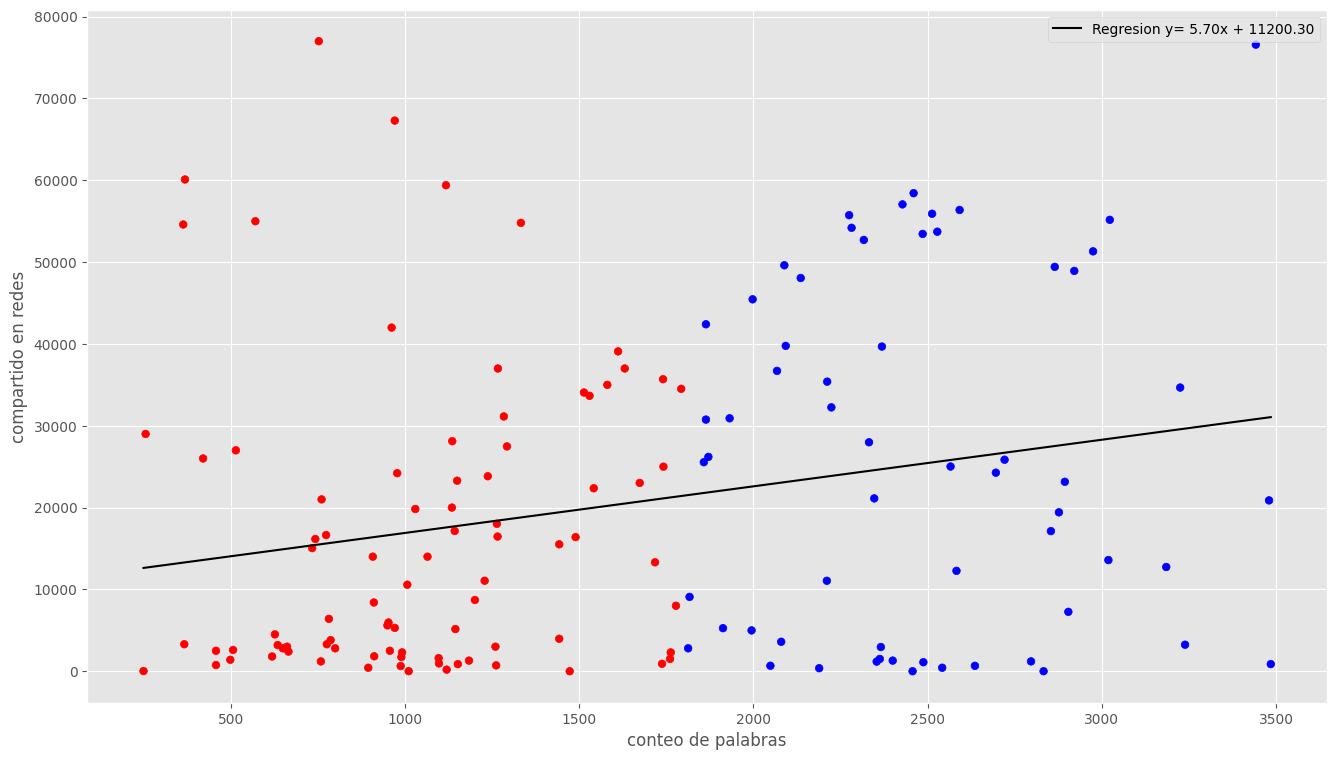

In [39]:
plt.scatter(f1, f2, c=assign, s=size[0])
plt.xlabel("conteo de palabras")
plt.ylabel("compartido en redes")

#valores encontrados
m = 5.69765366
b = 11200.30322307416

#puntos para la linea de regresion
x_line = np.array([min(f1), max(f1)])
y_line = m*x_line + b

plt.plot(x_line, y_line, color = "black", label=f"Regresion y= {m:.2f}x + {b:.2f}")
plt.legend()
plt.show()

In [32]:
#Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_dosmil = regre.predict([[2000]])
print(int(y_dosmil))

22595


C:\Users\pmorales\AppData\Local\Temp\ipykernel_14772\1607104264.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_dosmil))


Regresión con Múltiples Variables

In [45]:
suma = (filtered_data["# of Links"] + filtered_data["# of comments"].fillna(0) + filtered_data["# Images video"])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data["# Shares"].values

In [46]:
regre2 = linear_model.LinearRegression()

regre2.fit(XY_train, z_train)

z_pred = regre2.predict(XY_train)

print(f"Coefficients: {regre2.coef_}")
print("Mean Squared error: %.2f" % mean_squared_error(z_train, z_pred))
print("Variance score: %.2f" % r2_score(z_train, z_pred))

Coefficients: [   6.63216324 -483.40753769]
Mean Squared error: 352122816.48
Variance score: 0.11


VISUALIZAR EN 3D

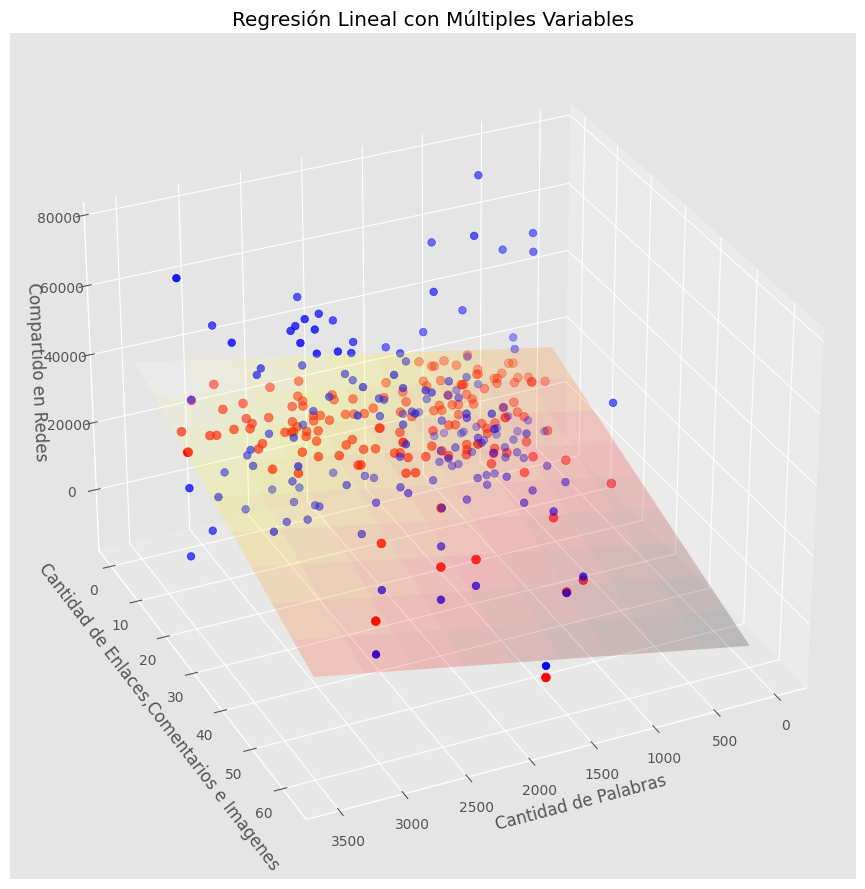

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

#malla para graficar
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

#calculo de balores de plano x e y
newX = (regre2.coef_[0] * xx)
newY = (regre2.coef_[1] * yy)

#valores para z
z = (newX + newY + regre2.intercept_)

ax.plot_surface(xx, yy, z, alpha=0.2, cmap="hot")

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c = "blue", s=30, label='Real')

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c = "red", s=40, label='Predicho')

ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.tight_layout()  # Mejora el espaciado
plt.show() 

In [63]:
z_dosmil = regre2.predict([[2000, 10+4+6]])
print(int(z_dosmil))

20518


C:\Users\pmorales\AppData\Local\Temp\ipykernel_14772\3447280145.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(z_dosmil))
